In [2]:
import os , csv
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

import pandas
import matplotlib.pyplot as plt
from tools.import_data import *
# curfilePath = os.getcwd()
# print (curfilePath)
# this will return parent directory.
# parentDir = os.path.abspath(os.path.join(curDir, os.pardir)) 
#use to load the CSV files
X_train, Y_train ,names_train = load_dataset(os.path.join('C:/Users/motibz/Documents/Studing/Final_Project/Cancer_Data_Mining/trin-SD01/trin-SD01.csv'))
X_test, Y_test ,names_test = load_dataset(os.path.join('C:/Users/motibz/Documents/Studing/Final_Project/Cancer_Data_Mining/trin-SD01/test-SD01.csv'))

In [3]:
# validation_size = 0.10
# X_train, X_val, Y_train, Y_val = model_selection.train_test_split(X, Y, test_size=validation_size)
print ('Train data shape: ', X_train.shape)
print ('Train labels shape: ', Y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', Y_test.shape)


Train data shape:  (92, 418976)
Train labels shape:  (92,)
Test data shape:  (88, 418976)
Test labels shape:  (88,)


In [4]:
# Spot Check Algorithms with cross validation
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
scoring = 'accuracy'
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.714444 (0.168512)


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LDA: 0.626667 (0.137005)


KNN: 0.582222 (0.161414)


CART: 0.575556 (0.146885)


NB: 0.617778 (0.115812)


SVM: 0.541111 (0.143505)


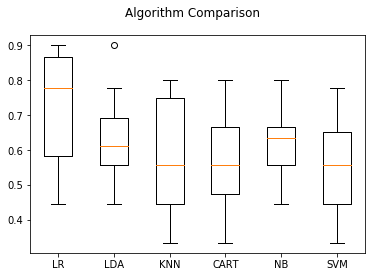

In [5]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [5]:
# Make predictions on test dataset
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print('Model ' , name)
    print('Accuracy: ', accuracy_score(Y_test, predictions))
    #print(confusion_matrix(Y_validation, predictions))
    print(classification_report(Y_test, predictions))
# 
# encoder(predict_dataset)
# #print (predict_dataset)
# predict=predict_dataset.values[:,0:22]
# 
# predictions = lr.predict(predict)

# temp = pandas.DataFrame(predict)
# temp['class'] = predictions
# temp.to_csv('predict.csv')

Model  LR
Accuracy:  0.784090909091
             precision    recall  f1-score   support

        "0"       0.43      0.17      0.24        18
        "1"       0.81      0.94      0.87        70

avg / total       0.74      0.78      0.74        88



C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Model  LDA
Accuracy:  0.261363636364
             precision    recall  f1-score   support

        "0"       0.21      0.94      0.34        18
        "1"       0.86      0.09      0.16        70

avg / total       0.72      0.26      0.19        88



Model  KNN
Accuracy:  0.545454545455
             precision    recall  f1-score   support

        "0"       0.19      0.39      0.26        18
        "1"       0.79      0.59      0.67        70

avg / total       0.67      0.55      0.59        88



Model  CART
Accuracy:  0.306818181818
             precision    recall  f1-score   support

        "0"       0.19      0.72      0.30        18
        "1"       0.74      0.20      0.31        70

avg / total       0.62      0.31      0.31        88



Model  NB
Accuracy:  0.306818181818
             precision    recall  f1-score   support

        "0"       0.21      0.89      0.34        18
        "1"       0.85      0.16      0.27        70

avg / total       0.72      0.31      0.28        88



Model  SVM
Accuracy:  0.204545454545
             precision    recall  f1-score   support

        "0"       0.20      1.00      0.34        18
        "1"       0.00      0.00      0.00        70

avg / total       0.04      0.20      0.07        88



C:\Users\motibz\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
